 # Exploratory Data Analysis
 
For this notebook, I will be using the following libraries:

- pandas for data manipulation.
- seaborn and matplotlib for data visualizing.
- scipy for statistical operations.

## 1- Import the required libraries

In [1]:
# Data manipulation and mathematical operations
import pandas as pd
import numpy as np 

# Data visualization 
%matplotlib inline
import seaborn as sns 
import matplotlib.pylab as plt
from matplotlib.pyplot import figure

# # Statistical computations
from scipy.stats import norm
from scipy import stats
from scipy.stats import skew
import seaborn as sns


In [2]:
### Define some useful functions 
#The function is used to determine the type of the column:Categorical or Numerical  
def utils_recognize_type(dtf, col, max_cat):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

This notebook includes some instructions that should be pursued by any data scientist before applying any machine learning algorithm. It resumes all the required steps to be done during the data exploration phase. I suppose that I am using a cleaned data and all cleaning tasks were performed in the previous step: data cealing and transformation

Actually, the notebook is divided into two main parts :

        - Part 1: Summary Statistics 
        - Part 2: Data visualization 

## 2- Data reading 

In [3]:
df=pd.read_csv('./data/house_price_dataset.csv')
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [4]:
c=[c for c in df.MoSold.unique()]
c

[2, 5, 9, 12, 10, 8, 11, 4, 1, 7, 3, 6]

In [5]:
# Giving look to the tail
df.tail(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


## 3- Data exploration
- Exploratory Data Analysis (EDA), a method used to analyze and summarize data sets in a statistical manner. 
- EDA is the second step applied by data scientists to explore, analyze, and investigate a given clean data set.
- This essential examination step helps data scientists gather a general overview about their data (initial feel for the data), summarize its main characteristics and perform some primary representations. 
- It helps detect patterns and trends in the data set 

###  3.1. More information 

Here is more information about the features and types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 3.2- Data frame shape 
My data frame contains 1460 rows and 81 columns

In [7]:
df.shape

(1460, 81)

### 3.3-  Columns names 
Determining columns name in my data frame. Here I have 27 columns as I mentioned before. 

In [8]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### 3.4- Statistical summary 

In the statistical description we try to select the next values for our numerical features: 

- Maximum values 
- Minimum 
- Average 
- Standard deviation 
- Median 
- Mean

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [10]:
# We can just get the description of our Target value 
df.SalePrice.describe().transpose()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Including all features either numerical or categorical

In [11]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460.0,NaN,NaN,NaN,730.5,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,NaN,NaN,NaN,56.89726,42.300571,20.0,20.0,50.0,70.0,190.0
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201.0,NaN,NaN,NaN,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
LotArea,1460.0,NaN,NaN,NaN,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.5,215245.0
...,...,...,...,...,...,...,...,...,...,...,...
MoSold,1460.0,NaN,NaN,NaN,6.321918,2.703626,1.0,5.0,6.0,8.0,12.0
YrSold,1460.0,NaN,NaN,NaN,2007.815753,1.328095,2006.0,2007.0,2008.0,2009.0,2010.0
SaleType,1460,9,WD,1267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleCondition,1460,6,Normal,1198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.5- Values Count

If you want to know values count per feature. In the next example, I have selected `SaleCondition`. It is mostly used with categorical data. 

In [12]:
sale_condition_count=df['SaleCondition'].value_counts().to_frame()
sale_condition_count

,SaleCondition
Normal,1198
Partial,125
Abnorml,101
Family,20
Alloca,12
AdjLand,4


In [13]:
#example with two columns
sale_condition_type_count=df[['SaleCondition','SaleType']].value_counts().to_frame()
sale_condition_type_count

0
SaleCondition SaleType      
Normal        WD        1160
Partial       New        122
Abnorml       WD          70
              COD         24
Family        WD          19
Normal        COD         19
Alloca        WD          12
Normal        ConLD        6
              ConLw        5
AdjLand       WD           4
Normal        ConLI        4
Abnorml       Oth          3
Normal        CWD          2
              Con          2
Abnorml       ConLD        2
Partial       WD           2
Family        CWD          1
Abnorml       CWD          1
              ConLI        1
Partial       ConLD        1

### 3.6- Data sampling 

- Sometimes, it is more advantageous to make random data sampling especially, for large datasets. In this case, data sampling helps making computation easier.
- Training our model on random data samples can help reduce complexity and computational time.
- Sometimes, it is required to perform over/undersampling in case we have Imbalanced datasets such as 1:100 or 1:1000 examples in the minority class to the majority class.
    - Random Oversampling: Randomly duplicate examples in the minority class and add them to training dataset.
    - Random Undersampling: Randomly delete examples in the majority class.
- Training your model on biased dataset can influence outcomes of your built model as it will ignore the minority class entirely. 
- For examples class 1 has 1800 samples while class 2 has 40 samples only ==> it is required to perform undersampling.
- The same for oversampling, 

By looking at `sale_condition_count` results, class `AdjLand` has only 4 samples compared to `Normal` class


In [14]:
sale_condition_count

,SaleCondition
Normal,1198
Partial,125
Abnorml,101
Family,20
Alloca,12
AdjLand,4


### 3.7- Data Grouping using `groupby` 

selecting maximum / Minimum Sale price for each `YearRemodAdd` 

In [15]:
df_group=df[['YearRemodAdd','SalePrice']].groupby(by=['YearRemodAdd']).max()
df_group.reset_index(level=['YearRemodAdd'], inplace=True)
df_group

,YearRemodAdd,SalePrice
0,1950,256000
1,1951,141000
2,1952,166000
3,1953,225000
4,1954,165000
...,...,...
56,2006,556581
57,2007,440000
58,2008,555000
59,2009,582933


selecting average Sale price for each `YearRemodAdd` 

In [16]:
df_group=df[['YearRemodAdd','SalePrice']].groupby(by=['YearRemodAdd']).mean()
df_group.reset_index(level=['YearRemodAdd'], inplace=True)
df_group

,YearRemodAdd,SalePrice
0,1950,117463.056180
1,1951,129975.000000
2,1952,110398.600000
3,1953,147640.000000
4,1954,121142.857143
...,...,...
56,2006,229471.134021
57,2007,224807.250000
58,2008,269709.100000
59,2009,284085.391304


We can also calculate the sum, the number of samples etc...
### 3.8- Data filtering 

Selecting samples where `SalePrice` is greater than 200 k 

In [17]:
df_filter =df[df.SalePrice>200000]
df_filter

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,1443,60,FV,85.0,11003,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,310000
1447,1448,60,RL,80.0,10000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,240000
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000


Selecting samples where `SalePrice` is greater than 150 k  and `YearRemodAdd` is equal to 2008

In [18]:
df_filter =df[(df.SalePrice>150000) & (df.YearRemodAdd==2008)]
df_filter.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
27,28,20,RL,98.0,11478,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,306000
151,152,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,New,Partial,372402
240,241,20,FV,75.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,262500
282,283,120,RL,34.0,5063,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,ConLw,Normal,207500
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000


Selecting samples where `YearRemodAdd` is equal to 2008 or `YrSold` is greater than 2011

In [19]:
df_filter =df[(df.YrSold>2011) | (df.YearRemodAdd==2008)]
df_filter.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
27,28,20,RL,98.0,11478,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,306000
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
151,152,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,New,Partial,372402
240,241,20,FV,75.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,262500
282,283,120,RL,34.0,5063,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,ConLw,Normal,207500


##  4- Data analysis

Analysing the relationship between variables, such as correlation, is very essential step in the data analysis phase. Correlation is the most important information to get before applying any machine learning algorithm. It consists of establishing the relationship between the target variable and any other feature. 


Correlation analysis is very useful, especially, in regression problems as it helps identifies the most important features or any other variable that has direct impact on the target variable. It distinguishes variables that should be discarded from our analysis as they have no relation with our target feature. Only numerical varibale are considered in the correlation analysis. Actually, there is three types of data analysis using visualization techniques :

- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis 

In [20]:
#selecting only subset of our numerical features 
numerical_columns=['MSSubClass', 'LotArea', 'LotFrontage', 'YearRemodAdd',
                          'YearBuilt', 'OverallCond', 'SalePrice','MoSold', 'SaleCondition']
df_select=df[numerical_columns]
df_select.head(2)

# To test more  'OverallQual', 'MasVnrArea', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF'

,MSSubClass,LotArea,LotFrontage,YearRemodAdd,YearBuilt,OverallCond,SalePrice,MoSold,SaleCondition
0,60,8450,65.0,2003,2003,5,208500,2,Normal
1,20,9600,80.0,1976,1976,8,181500,5,Normal


### 4.1- Univariate Analysis : `distplot` and `histplot`
Univariate analysis is the simplest form of analysis, where we examine each variable individually. Let’s start by looking at the distribution of `MSSubClass`, `LotArea`, `LotFrontage`, `YearRemodAdd` columns from our dataset.
For example, we are going to use histograms to visualize the distribution of each of previous features.

Actually, distribution plots are frequently used during Exploratory Data Analysis because they illustrate the values range taken by each of our variables as well as which values occur most often.

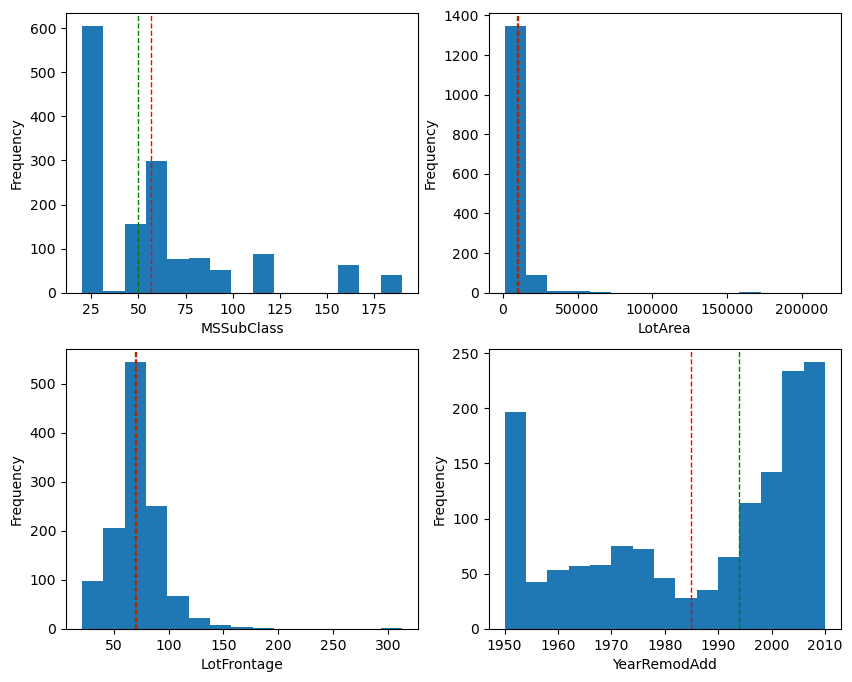

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(10,8))
for i, ax in enumerate(axes.ravel()):
    ax.hist(df_select.iloc[:, i], bins=15)
    ax.set_xlabel(df_select.columns[i])
    ax.set_ylabel('Frequency')
    ax.axvline(df_select.iloc[:, i].mean(), color='r', linestyle='dashed', linewidth=1)
    ax.axvline(df_select.iloc[:, i].median(), color='g', linestyle='dashed', linewidth=1)
plt.show()

`LotFrontage` has normal distribution while `YearRemodAdd` has bimodal distribution


Here is a second example of univariate analysis, I am going to select only two variables, which are 'SalePrice' and 'LotFrontage' to analyse their disrtribution.


/var/folders/x_/_mmvg5sn65b5cx8542pkt62w0000gp/T/ipykernel_47215/1098261288.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_select['SalePrice'])
/var/folders/x_/_mmvg5sn65b5cx8542pkt62w0000gp/T/ipykernel_47215/1098261288.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_select['Lot

<Axes: xlabel='LotFrontage', ylabel='Density'>

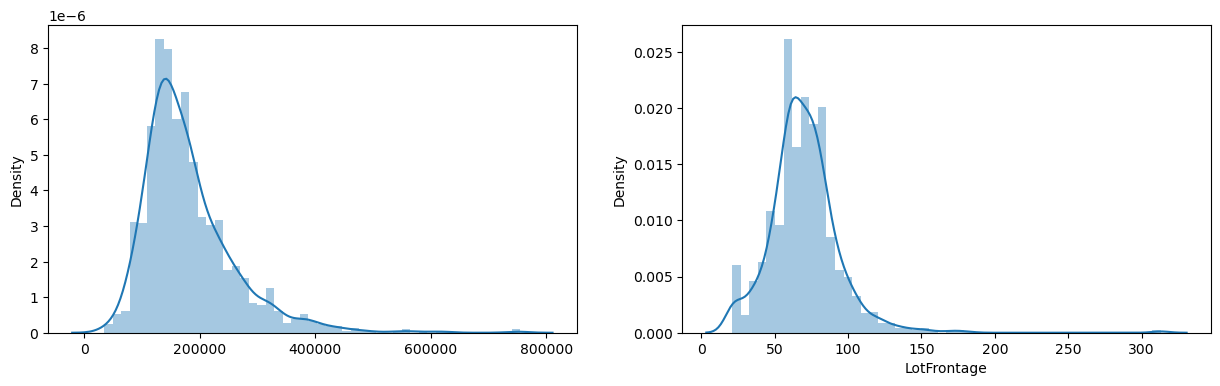

In [22]:
plt.figure(figsize=(15, 4))
#figure(figsize=(15, 4))
plt.subplot(1,2,1)
sns.distplot(x=df_select['SalePrice'])
plt.subplot(1,2,2)
sns.distplot(df_select['LotFrontage'])

As you see, it is written that `distplot` is deprecated so it is better to use `histplot` 

<Axes: xlabel='LotFrontage', ylabel='Count'>

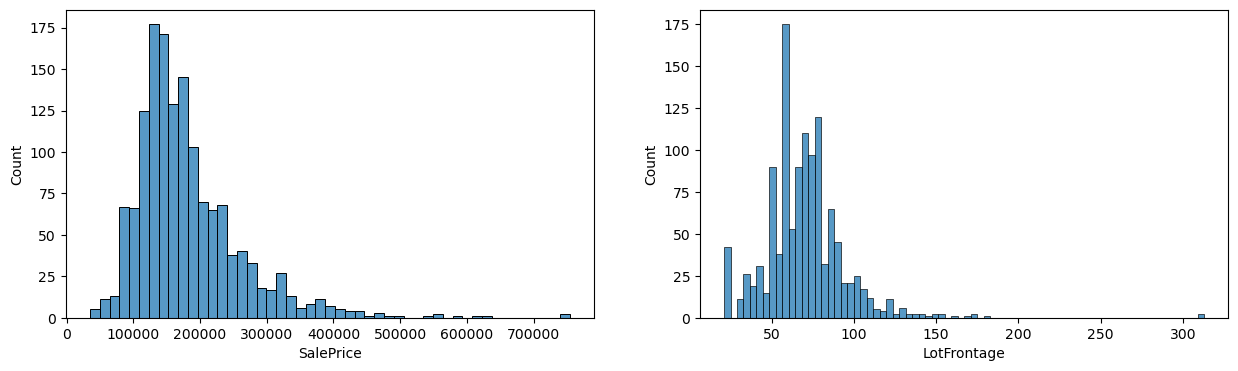

In [23]:
plt.figure(figsize=(15, 4))
#figure(figsize=(15, 4))
plt.subplot(1,2,1)
sns.histplot(x=df_select['SalePrice'])
plt.subplot(1,2,2)
sns.histplot(df_select['LotFrontage'])

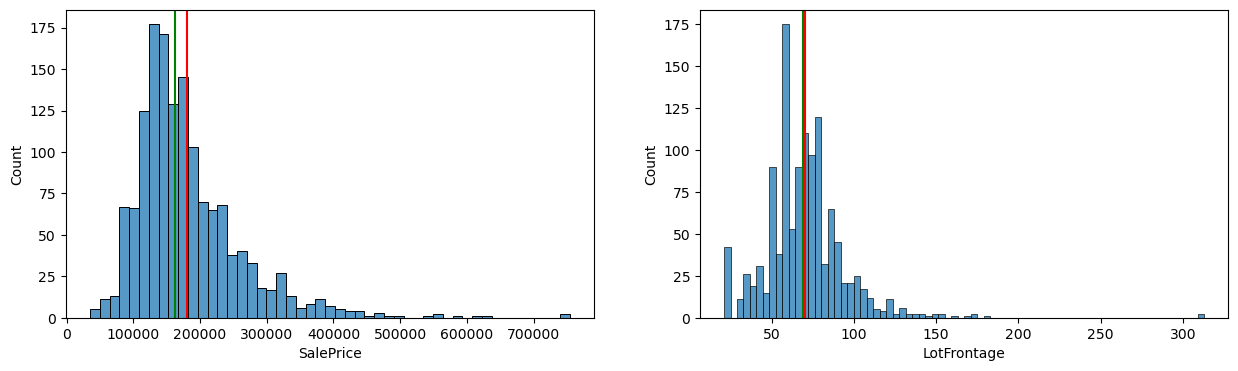

In [24]:
plt.figure(figsize=(15, 4))
#figure(figsize=(15, 4))
plt.subplot(1,2,1)
sns.histplot(x=df_select['SalePrice'])
plt.axvline(x = df['SalePrice'].mean(), c = 'red')
plt.axvline(x = df['SalePrice'].median(), c = 'green')
plt.subplot(1,2,2)
sns.histplot(df_select['LotFrontage'])
plt.axvline(x = df['LotFrontage'].median(), c = 'green')
plt.axvline(x = df['LotFrontage'].mean(), c = 'red')  

`SalePrice` and `LotFrontage` have normal distribution

### 4.2- Bivariate Analysis
Bivariate analysis involves analyzing the relationship between two variables. We can use scatter plots to visualize the relationship between each pair of feature.
#### Paiplots

/Users/badiaamakhlouf/opt/anaconda3/envs/data_test/lib/python3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


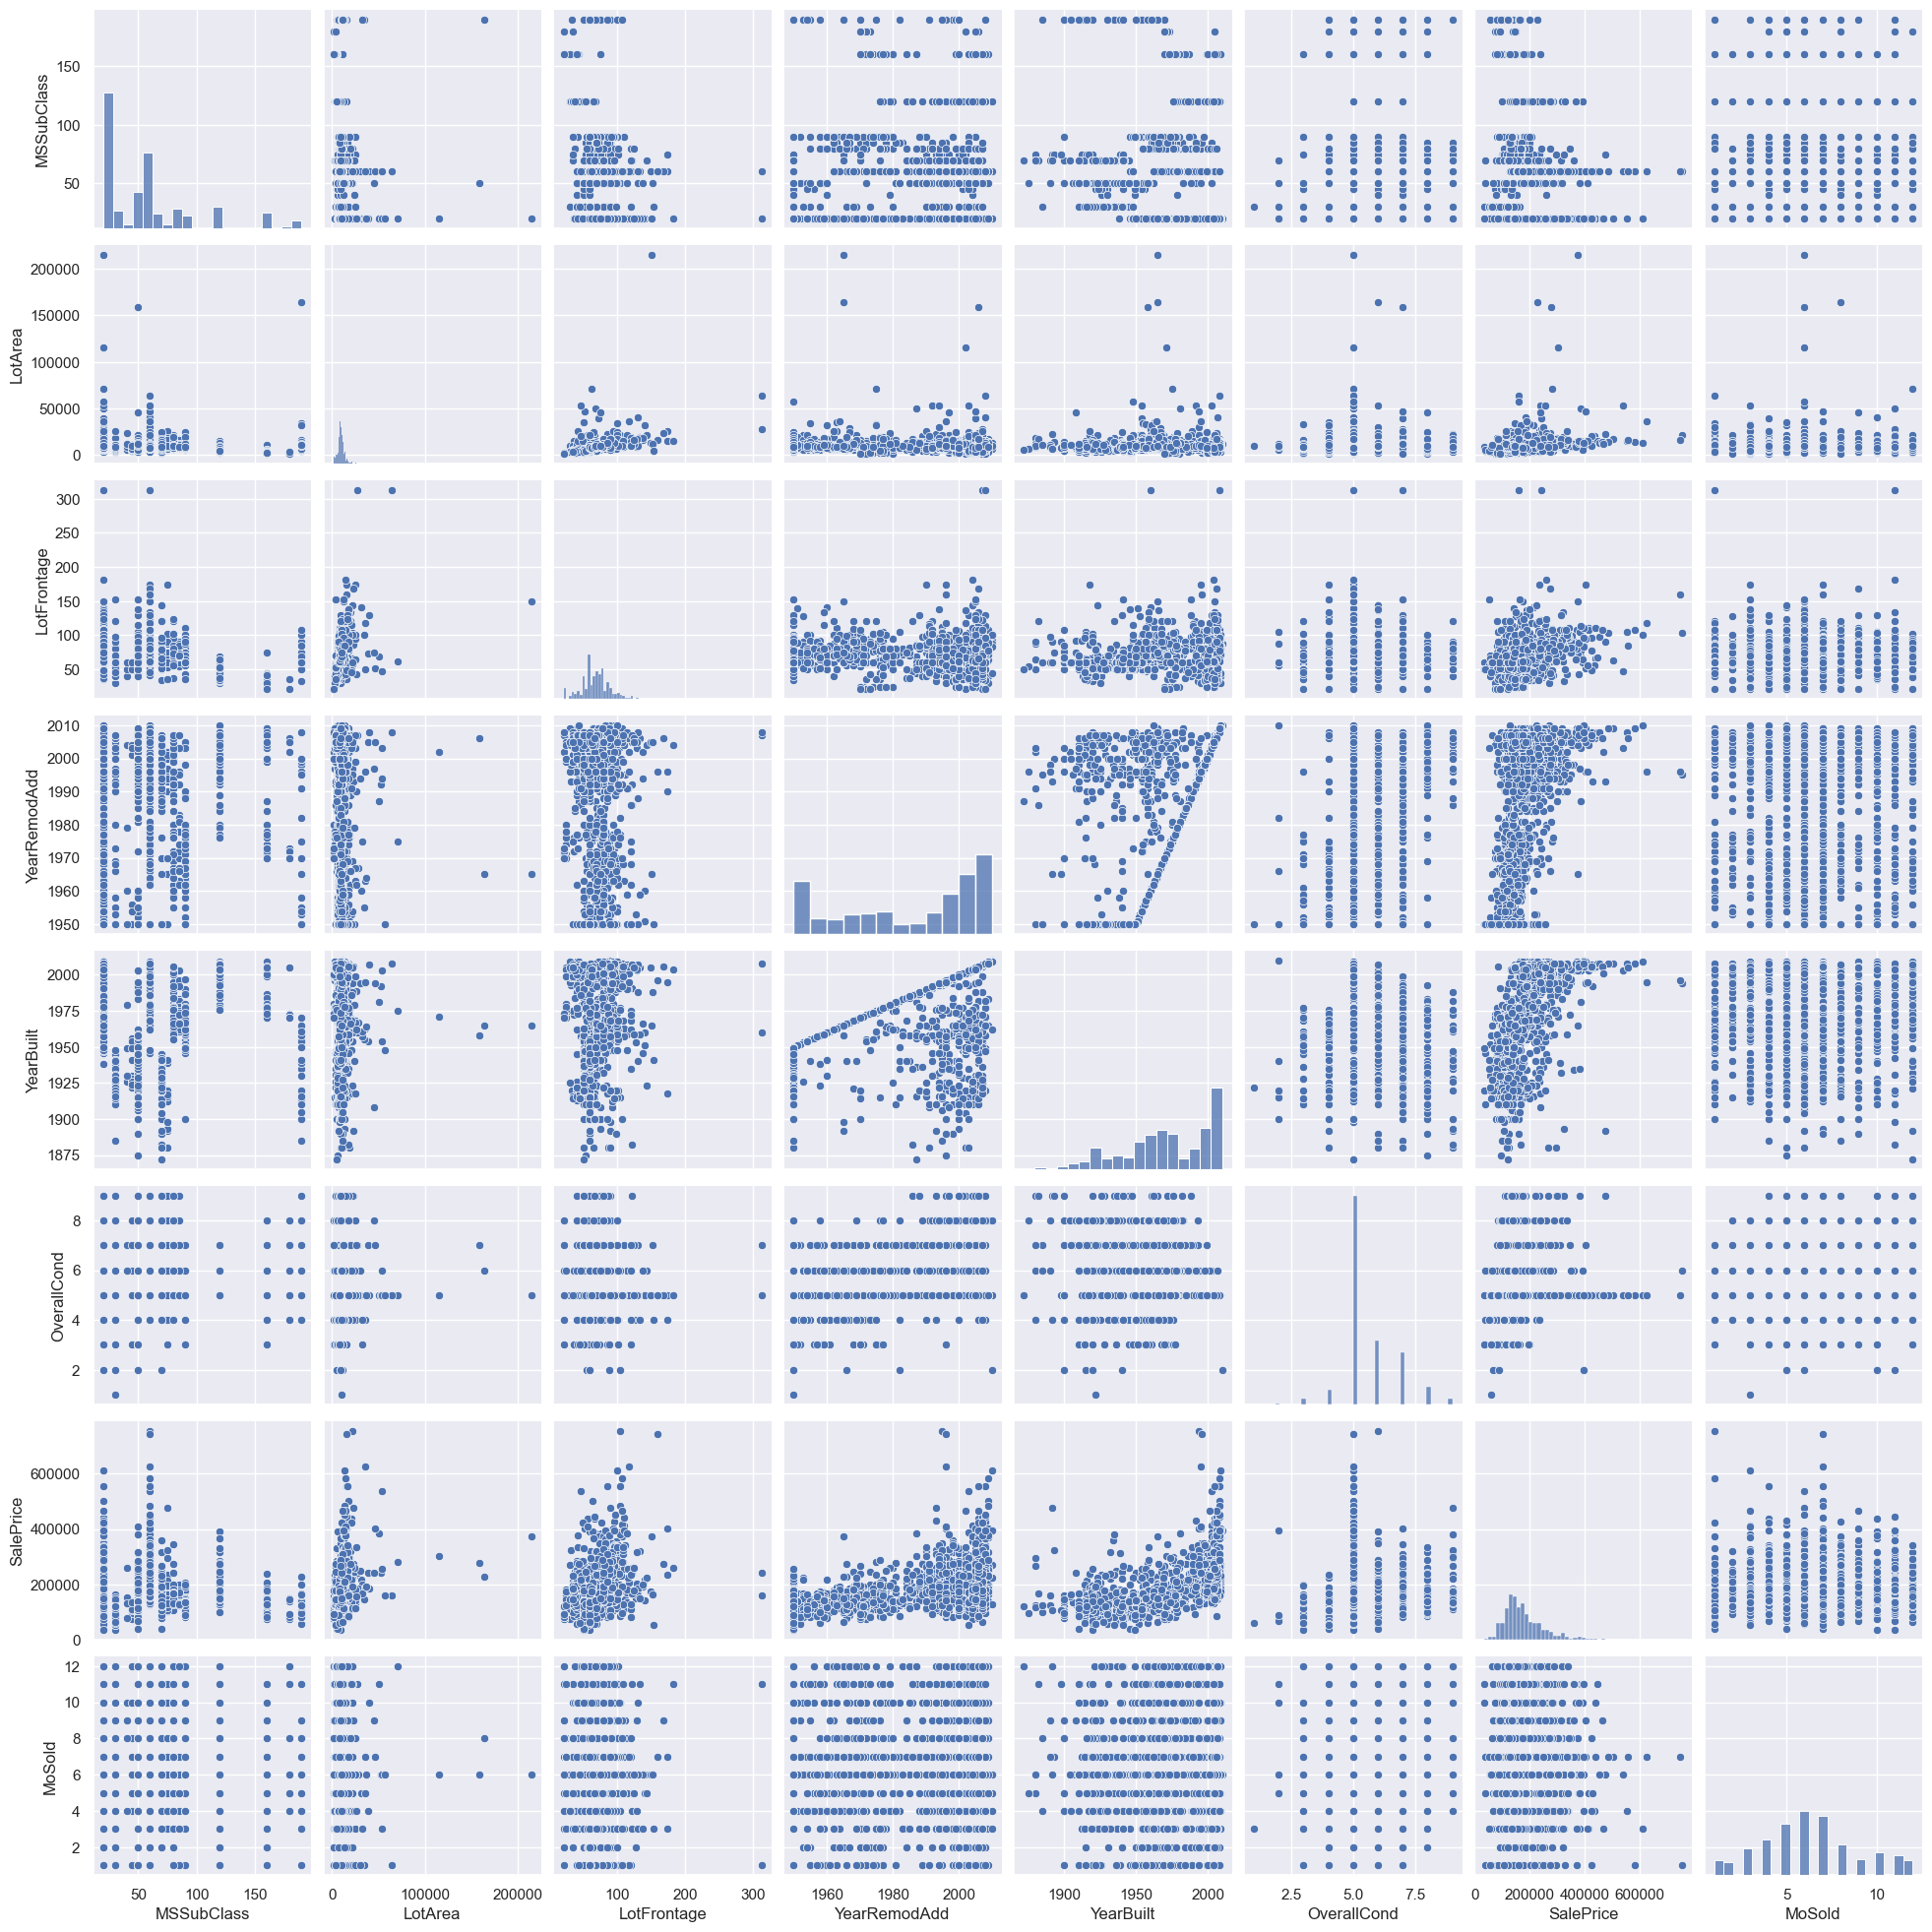

In [25]:
sns.set()
sns.pairplot(df_select, size = 2.5)
plt.show();

FacetGrid maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to levels of variables in the dataset.

Please, give a look at this link for more details : https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

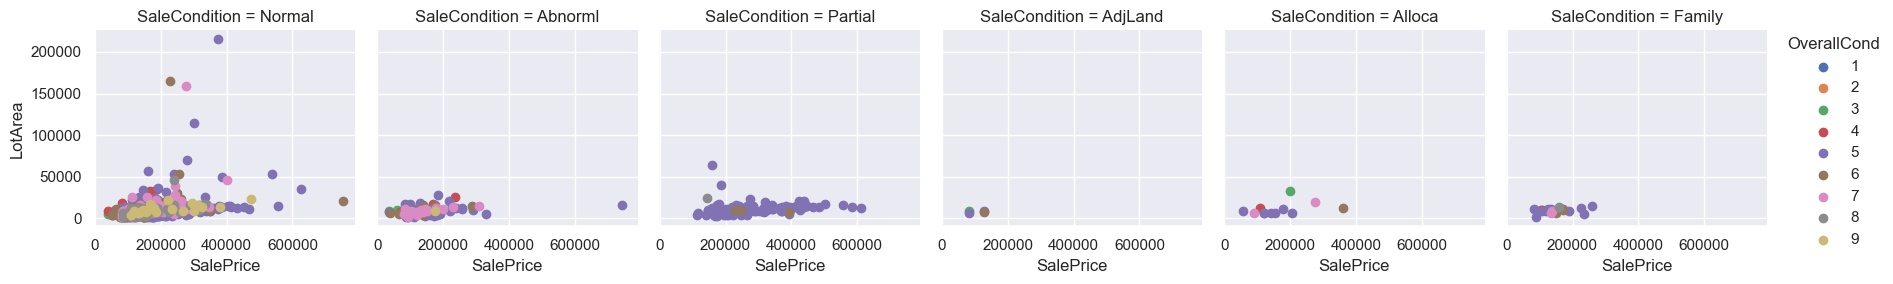

In [26]:
g=sns.FacetGrid(df_select, col='SaleCondition', hue="OverallCond")
g.map(plt.scatter,"SalePrice","LotArea")
g.add_legend()

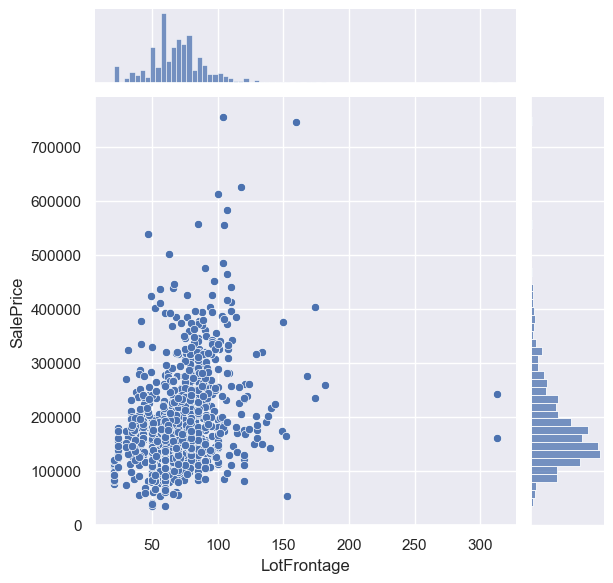

In [27]:
sns.jointplot(data=df_select, x="LotFrontage", y="SalePrice")

In [28]:
df_group=df_select.groupby(by=['SaleCondition']).count()
df_group.reset_index(level=['SaleCondition'], inplace=True)
df_group=df_group[['SaleCondition', 'YearRemodAdd', 'LotFrontage']]
df_group

,SaleCondition,YearRemodAdd,LotFrontage
0,Abnorml,101,84
1,AdjLand,4,4
2,Alloca,12,10
3,Family,20,18
4,Normal,1198,961
5,Partial,125,124


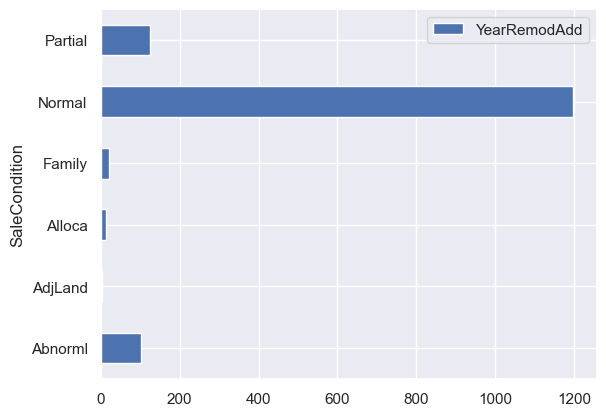

In [29]:
ax=df_group.plot.barh(x='SaleCondition', y='YearRemodAdd')

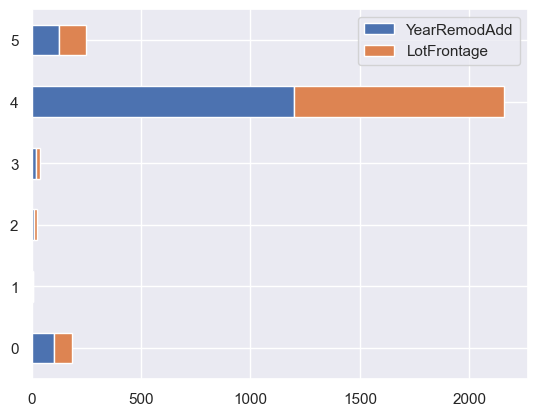

In [30]:
ax = df_group.plot.barh(stacked=True)

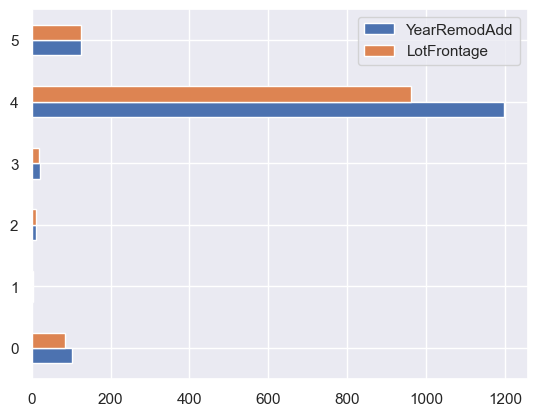

In [42]:
ax = df_group.plot.barh()

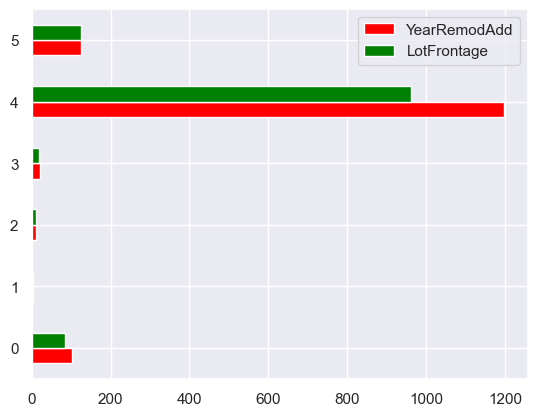

In [43]:
ax = df_group.plot.barh(color={"YearRemodAdd": "red", "LotFrontage": "green"})

### 4.3- Multivariate Analysis 
Multivariate analysis involves analyzing the relationship between three or more variables. We can use scatter matrix plots to visualize the relationship between each pair of features, along with the distribution of each feature.



In [32]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


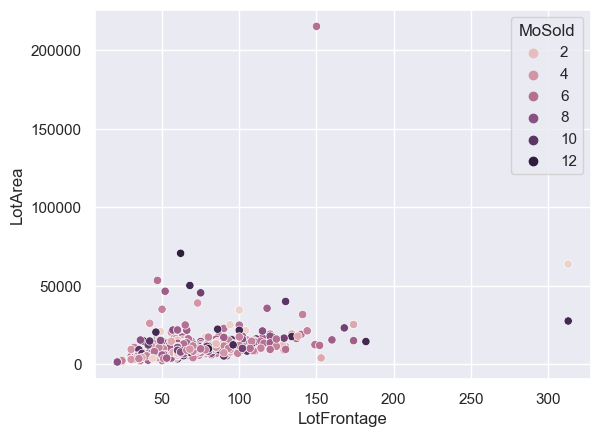

In [33]:
sns.scatterplot(data=df_select, x="LotFrontage", y="LotArea", hue="MoSold")
plt.show()

### Correlation matrix and heatmap
Many methods are useful to discover correlation between the target variable and the rest of the features such as pair plots, scatter plots, heatmaps and correlation matrix. Correlation coefficient can only be calculated on the numerical attributes (floats and integers), therefore, only the numeric attributes will be selected.

The correlation is calculated using the pearson correlation coefficient, which measures how closely two sequences of numbers are correlated. Therefore, only numerical attributes (floats and integers) are selected while calculating correlation coefficient.  


/var/folders/x_/_mmvg5sn65b5cx8542pkt62w0000gp/T/ipykernel_47215/1623493178.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_select.corr(), cmap='viridis', annot=True)


Text(0.5, 1.0, 'Heat Map')

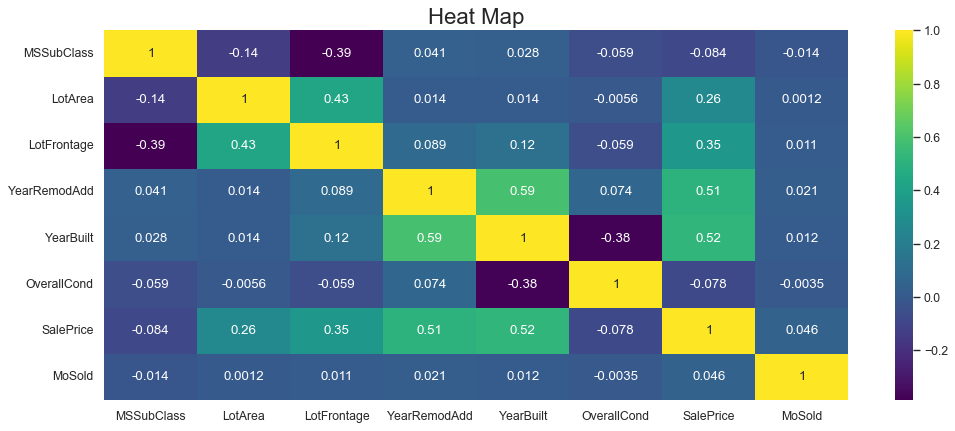

In [34]:
figure(figsize=(15, 6), dpi=80)
sns.heatmap(df_select.corr(), cmap='viridis', annot=True)
plt.title('Heat Map', fontsize =20)

In [35]:
df_select.columns

Index(['MSSubClass', 'LotArea', 'LotFrontage', 'YearRemodAdd', 'YearBuilt',
       'OverallCond', 'SalePrice', 'MoSold', 'SaleCondition'],
      dtype='object')

From the Graph below it is clear that our Target `SalePrice` is positively correlated with `YearRemodAdd` and `YearBuilt`, `LotFrontage` and `LotArea`, respectively.

In [36]:
# Here are values of the correlation matrix
corr_matrix=df_select.corr()
corr_matrix

/var/folders/x_/_mmvg5sn65b5cx8542pkt62w0000gp/T/ipykernel_47215/4003523601.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df_select.corr()


,MSSubClass,LotArea,LotFrontage,YearRemodAdd,YearBuilt,OverallCond,SalePrice,MoSold
MSSubClass,1.000000,-0.139781,-0.386347,0.040581,0.027850,-0.059316,-0.084284,-0.013585
LotArea,-0.139781,1.000000,0.426095,0.013788,0.014228,-0.005636,0.263843,0.001205
LotFrontage,-0.386347,0.426095,1.000000,0.088866,0.123349,-0.059213,0.351799,0.011200
YearRemodAdd,0.040581,0.013788,0.088866,1.000000,0.592855,0.073741,0.507101,0.021490
YearBuilt,0.027850,0.014228,0.123349,0.592855,1.000000,-0.375983,0.522897,0.012398
OverallCond,-0.059316,-0.005636,-0.059213,0.073741,-0.375983,1.000000,-0.077856,-0.003511
SalePrice,-0.084284,0.263843,0.351799,0.507101,0.522897,-0.077856,1.000000,0.046432
MoSold,-0.013585,0.001205,0.011200,0.021490,0.012398,-0.003511,0.046432,1.000000


## 5- Data visualization

Text(0, 0.5, 'Sale price')

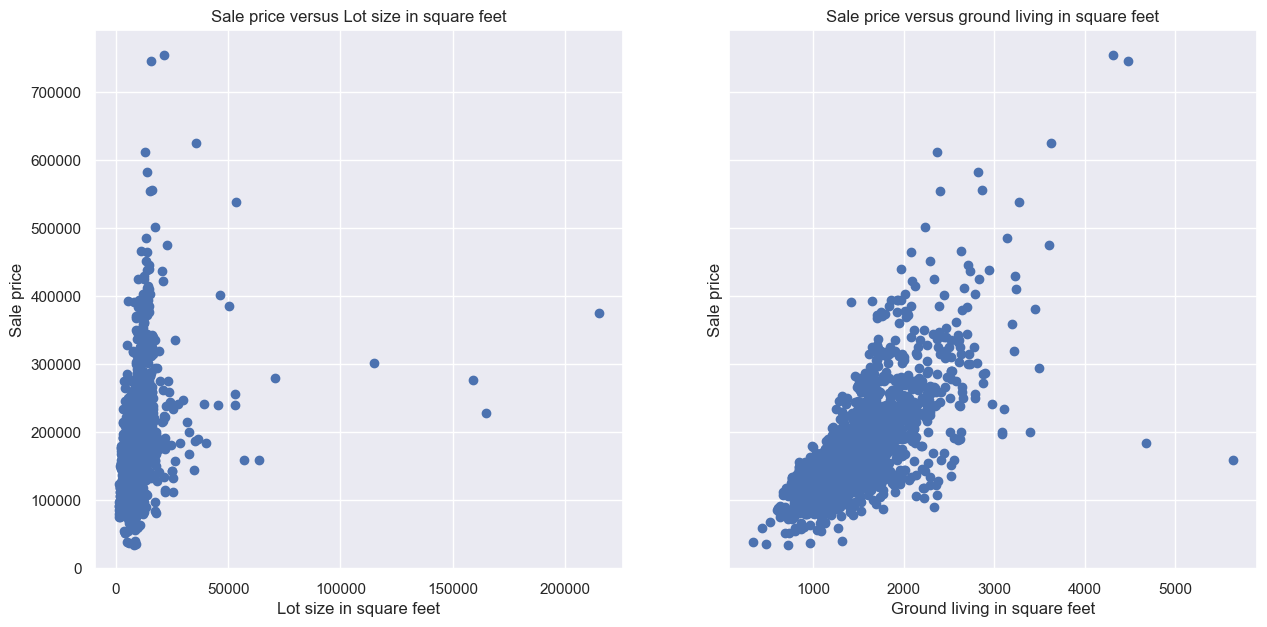

In [37]:
fig, axs = plt.subplots(1,2, figsize=(15,7), sharey='row')
ax1,ax2 = axs
ax1.scatter(df_select.LotArea, df_select.SalePrice)
ax2.scatter(df.GrLivArea, df.SalePrice)
ax1.set_title('Sale price versus Lot size in square feet')
ax1.set_xlabel('Lot size in square feet')
ax1.set_ylabel('Sale price')
ax2.set_title('Sale price versus ground living in square feet')
ax2.set_xlabel('Ground living in square feet')
ax2.set_ylabel('Sale price')

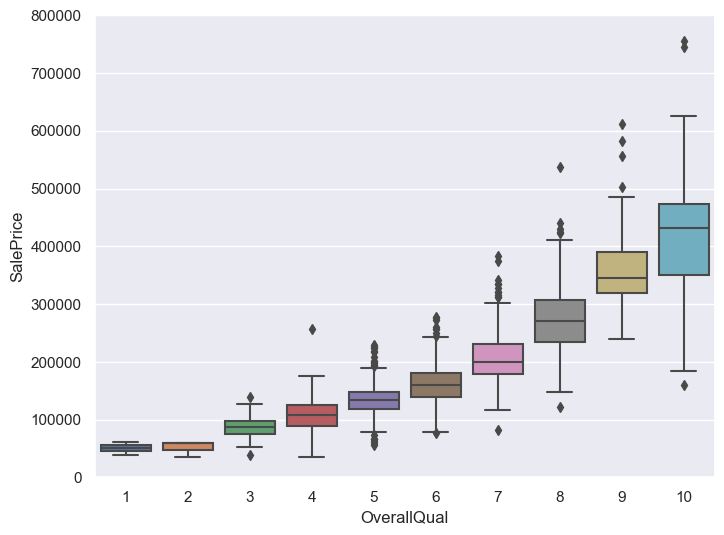

In [38]:
# Sale price versus OverallQual
# OverallQual : Rates the overall material and finish of the house
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=df)
fig.axis(ymin=0, ymax=800000);

In [39]:
df_sort=df[['YearBuilt','SalePrice']]
df_sort=df_sort.sort_values(by='YearBuilt')
df_sort

,YearBuilt,SalePrice
1349,1872,122000
1137,1875,94000
747,1880,265979
304,1880,295000
1132,1880,117500
...,...,...
898,2009,611657
515,2009,402861
157,2009,269500
762,2009,215200


Text(0, 0.5, 'Sale price')

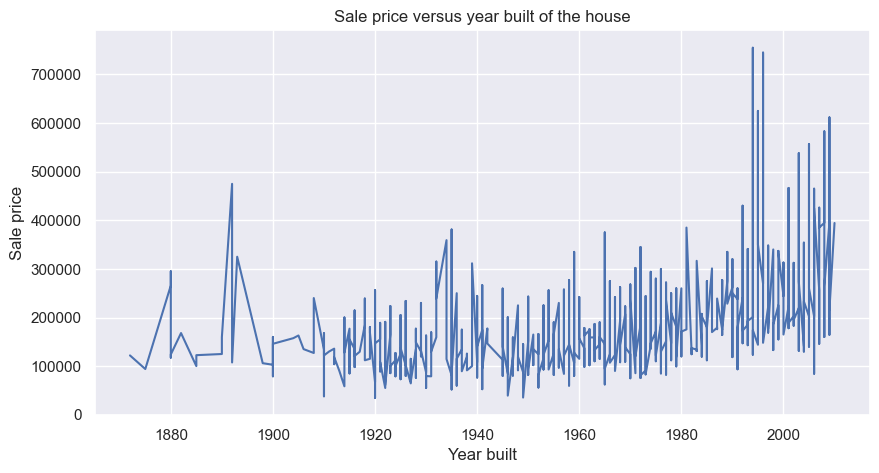

In [40]:
plt.figure(figsize=(10,5))
plt.plot(df_sort.YearBuilt, df_sort.SalePrice, 'b-')
plt.title("Sale price versus year built of the house")
plt.xlabel('Year built')
plt.ylabel("Sale price")

We can select to plot the Sale price for house in `Pave` street only or for houses with `PoolArea=0` or for houses with `LotArea<8000` etc. 

In [41]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Conclusion :
    - This notebook is an example of how exploratory data analysis can be done 
    - This step comes after cleaning the data and performing some transformation if needed
    - This notebook is not yet finished and I will keep improve it 